# Customer Churn Prediction

### What is Churn?
When existing customers stops doing business or end a realtionship with the company. Customers mainly stops using the particular services becasuse of Lack of Usage, Poor Services or Better prices by competitors.

In this project we are going to build a churn model from beginning to end. The data used has come from Cellular Usage dataset which include actual records of the cellphone company.

In this project "Churn" is defined as customer cancel their cellular plan at a given point in time.

### The steps which we are going to follow to create the project:

1. Understanding the data

2. Exploratory Data Analysis (EDA)
   - Univariate Analysis
   - Bivariate Analysis
   - Correlation in Numerical variables
   
3. Data Preprocessing
   - Encoding binary variables
   - One hot endcoding
   - Feature Scaling
   
4. Model Building
   - Feature Engineering

5. Model Tuning
   - Hyperparameter Tuning
   - Grid Search
   - Random Search
   
6. Feature Importance

## Loading the data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn_data=pd.read_excel('Churn_Data.xlsx')

## Exploring Data Analysis

By doing the basic analysis on the given dataset we found that our data has 
* 3333 observations
* 21 variables

There are total: 
1. Numerical variables - 15 
2. Categorical variables - 5

In [3]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null object
Intl_Plan         3333 non-null object
Vmail_Plan        3333 non-null object
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
State             3333 non-null object
Area_Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [4]:
churn_data.describe(include=['O'])

,Churn,Intl_Plan,Vmail_Plan,State,Phone
count,3333,3333,3333,3333,3333
unique,2,2,2,51,3333
top,no,no,no,WV,338-8050
freq,2850,3010,2411,106,1


In [5]:
churn_data.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [6]:
cat_churn_data=['Churn','Intl_Plan','Vmail_Plan','State','Phone']

In [7]:
num_churn_data=['Account_Length','Vmail_Message','Day_Mins','Eve_Mins','Night_Mins','Intl_Mins','CustServ_Calls',
                'Day_Calls','Day_Charge','Eve_Calls','Eve_Charge','Night_Calls',
                'Night_Charge','Intl_Calls','Intl_Charge']

### Univariate Analysis

Created a function to visualize all the Independent Numerical and Categorical variables with resepect to dependent variables  **"Churn"**

In [8]:
def visualize_plot(df,col_to_exclude,tgt_col,object_mode=True):
    n=0
    this=[]
    if object_mode:
        n_rows=2
        n_cols=2
        width=20
        height=20
    else:
        n_rows=4
        n_cols=4
        width=20
        height=20
    for column in df.columns:
        if object_mode:
            if(df[column].dtypes=='O') & (column!=col_to_exclude):
                this.append(column)
        else:
            if(df[column].dtypes!='O') & (column!=tgt_col):
                this.append(column)
                
    fig, ax= plt.subplots(n_rows,n_cols, sharex= False, sharey=False, figsize=(width,height))
    for row in range(n_rows):
        for col in range(n_cols):
            if object_mode:
                g=sns.countplot(df[this[int(n)]],ax=ax[row][col])
            else:
                g=sns.distplot(df[this[int(n)]],ax=ax[row][col])
                
            ax[row,col].set_title("Column Name: {}".format(this[int(n)]))
            ax[row,col].set_xlabel("")
            ax[row,col].set_ylabel("")
            n+=1
    plt.show();
    return


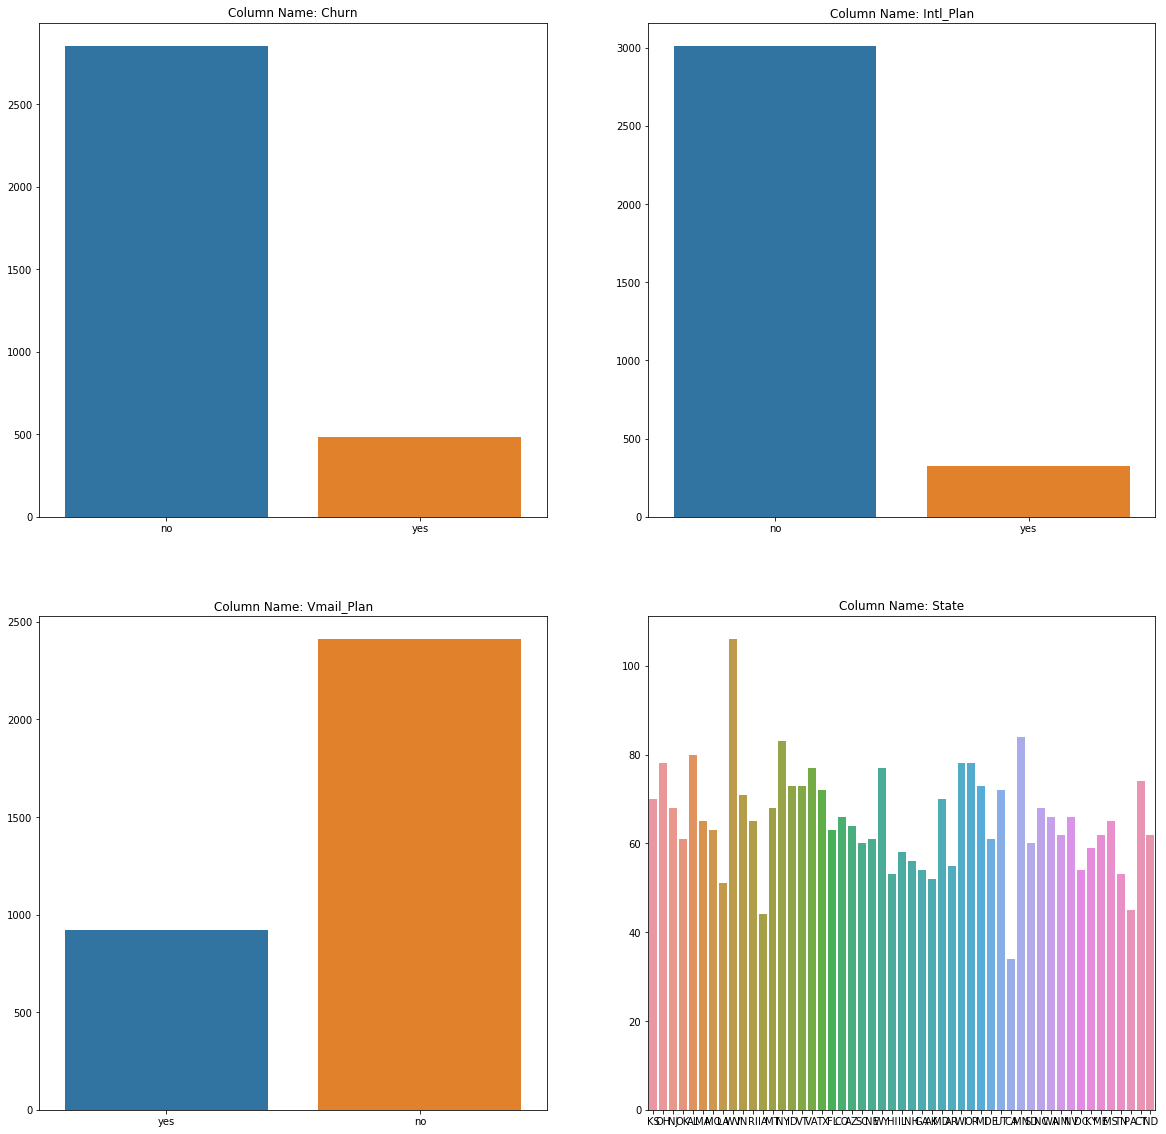

In [9]:
visualize_plot(churn_data,'Phone','Churn',object_mode =True)

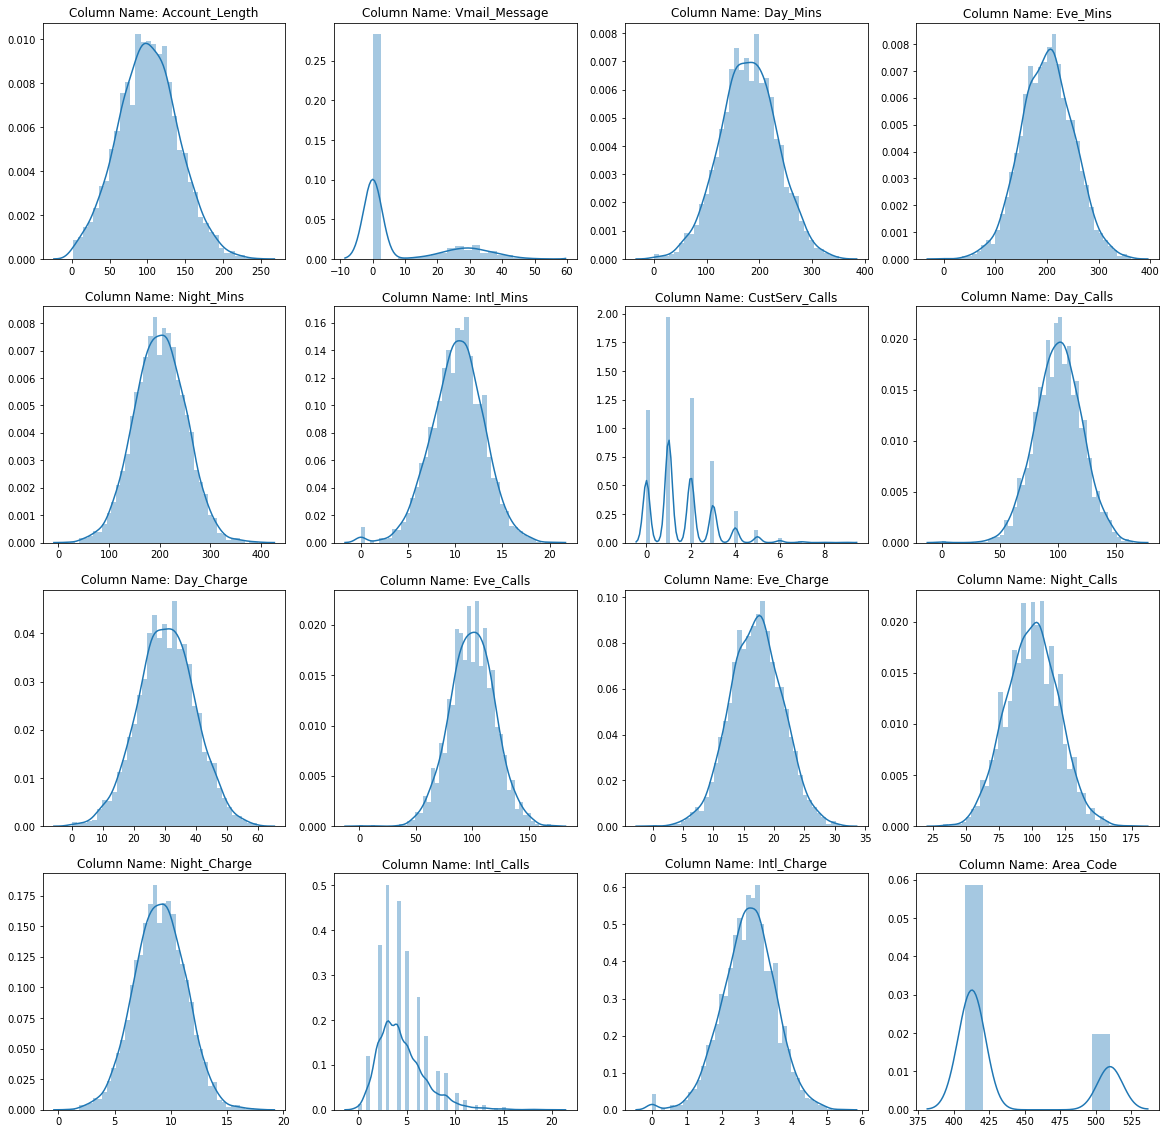

In [10]:
visualize_plot(churn_data,'Area_Code','Churn',object_mode =False)

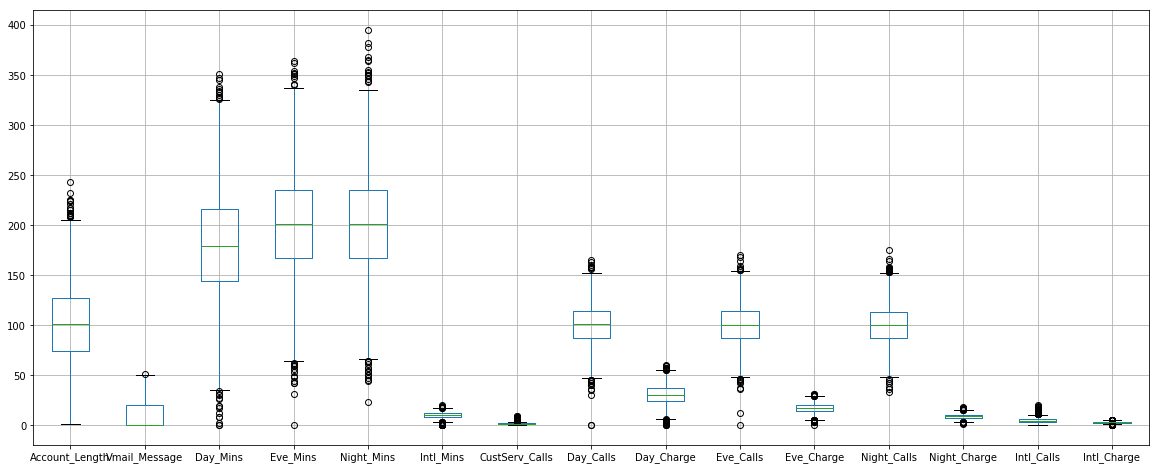

In [11]:
churn_data[num_churn_data].boxplot(return_type='axes',figsize=(20,8))

### Bivariate Analysis

In [12]:
def bi_variate(df,col1,col2):
    if col2=='Churn':
        cross_name=pd.crosstab(df[col1],df[col2]).apply(lambda x:x/x.sum()*100, axis=1)
    else:
        cross_name=pd.crosstab(df[col1],df[col2]).apply(lambda x:x/x.sum()*100, axis=0)
    #
    cross_name.plot.bar()
    plt.xlabel('{}'.format(col1))
    plt.ylabel('% of Churned Customers')
    plt.title('{} vs Churn'.format(col1))
    plt.xticks(rotation=0)
    plt.figure(figsize=(16,21))
    plt.show()
    return cross_name

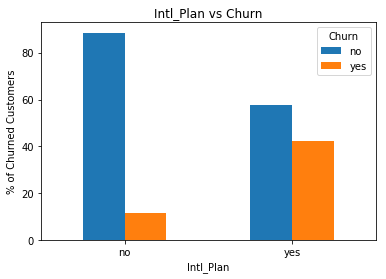

<Figure size 1152x1512 with 0 Axes>

Churn,no,yes
Intl_Plan,,
no,88.504983,11.495017
yes,57.585139,42.414861


In [13]:
bi_variate(churn_data,'Intl_Plan','Churn')

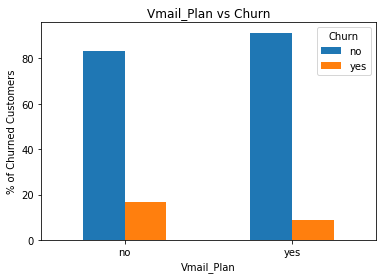

<Figure size 1152x1512 with 0 Axes>

Churn,no,yes
Vmail_Plan,,
no,83.284944,16.715056
yes,91.323210,8.676790


In [14]:
bi_variate(churn_data,'Vmail_Plan','Churn')

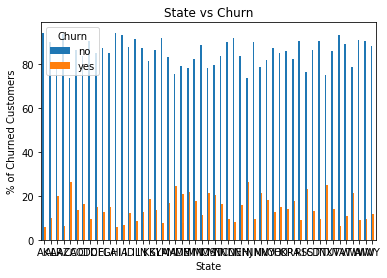

<Figure size 1152x1512 with 0 Axes>

Churn,no,yes
State,,
AK,94.230769,5.769231
AL,90.000000,10.000000
AR,80.000000,20.000000
AZ,93.750000,6.250000
CA,73.529412,26.470588
CO,86.363636,13.636364
CT,83.783784,16.216216
DC,90.740741,9.259259
DE,85.245902,14.754098


In [15]:
bi_variate(churn_data,'State','Churn')

### Correlation between the numericals variables

From the correaltion martix below we found that variables **"Day_Mins","Eve_Mins","Night_Mins","Intl_Mins"** are highly correlated with **"Day_Charge","Eve_Charge","Night_Charge","Intl_Charge"**

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]), <a list of 16 Text xticklabel objects>)

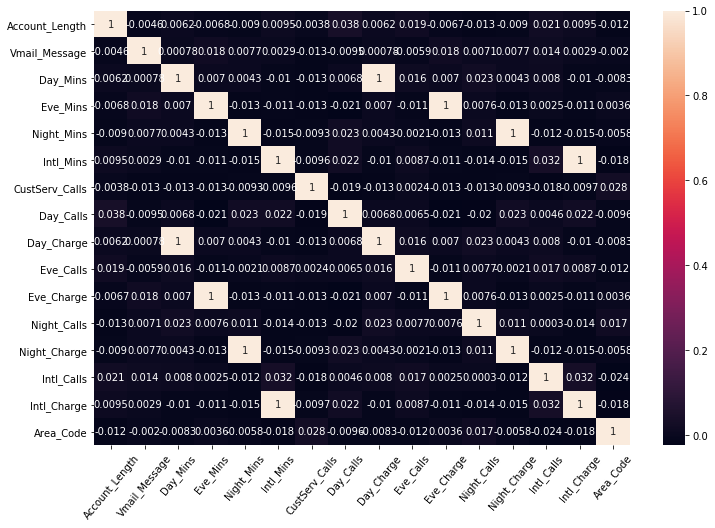

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(churn_data.corr(),xticklabels=churn_data.corr().columns.values,
           yticklabels=churn_data.corr().columns.values,annot=True);
plt.xticks(rotation=50)

## Data Pre-processing

### Encoding Binary Variables

It is preferable to have features like **'Churn'** encoded as 0 and 1 instead of no and yes, so that we can then feed it into machine learning algorithms that only accept numeric values. Besides 'Churn', other features **Intl_Plan**,**Vmail_Plan** that are of type object can be converted into 0s and 1s. 

In [17]:
churn_data['Intl_Plan']=churn_data['Intl_Plan'].replace({'no':0 , 'yes':1})
churn_data['Vmail_Plan']=churn_data['Vmail_Plan'].replace({'no':0 , 'yes':1})
churn_data['Churn']=churn_data['Churn'].replace({'no':0 , 'yes':1})

### One hot encoding

In [18]:
encoded_churn_data = pd.get_dummies(churn_data['State'])

In [19]:
encoded_churn_data.head(5)

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
## Merging both the dataframe with index
churn_data=pd.merge(churn_data,encoded_churn_data,right_index=True, left_index=True)

In [21]:
churn_data.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Feature Scaling

In [22]:
## From the correlation matrix we conclude we can remove highly correalted variables for better model
from sklearn.preprocessing import StandardScaler
churn_data_scaled=StandardScaler().fit_transform(churn_data[num_churn_data])
churn_data_scaled_df=pd.DataFrame(churn_data_scaled,columns= num_churn_data)


C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [23]:
churn_data_scaled_df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,0.676489,1.234883,1.566767,-0.070610,0.866743,-0.085008,-0.427932,0.476643,1.567036,-0.055940,-0.070427,-0.465494,0.866029,-0.601195,-0.085690
1,0.149065,1.307948,-0.333738,-0.108080,1.058571,1.240482,-0.427932,1.124503,-0.334013,0.144867,-0.107549,0.147825,1.059390,-0.601195,1.241169
2,0.902529,-0.591760,1.168304,-1.573383,-0.756869,0.703121,-1.188218,0.675985,1.168464,0.496279,-1.573900,0.198935,-0.755571,0.211534,0.697156
3,-0.428590,-0.591760,2.196596,-2.742865,-0.078551,-1.303026,0.332354,-1.466936,2.196759,-0.608159,-2.743268,-0.567714,-0.078806,1.024263,-1.306401
4,-0.654629,-0.591760,-0.240090,-1.038932,-0.276311,-0.049184,1.092641,0.626149,-0.240041,1.098699,-1.037939,1.067803,-0.276562,-0.601195,-0.045885


In [24]:
cat_churn_data_scaled=pd.DataFrame(data=churn_data,columns=cat_churn_data)

In [25]:
cat_churn_data_scaled.head()

,Churn,Intl_Plan,Vmail_Plan,State,Phone
0,0,0,1,KS,382-4657
1,0,0,1,OH,371-7191
2,0,0,0,NJ,358-1921
3,0,1,0,OH,375-9999
4,0,1,0,OK,330-6626


In [26]:
churn_data_scaled_df=pd.merge(cat_churn_data_scaled,churn_data_scaled_df,right_index=True, left_index=True)

In [27]:
churn_data_scaled_df.head()

,Churn,Intl_Plan,Vmail_Plan,State,Phone,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,0,0,1,KS,382-4657,0.676489,1.234883,1.566767,-0.070610,0.866743,-0.085008,-0.427932,0.476643,1.567036,-0.055940,-0.070427,-0.465494,0.866029,-0.601195,-0.085690
1,0,0,1,OH,371-7191,0.149065,1.307948,-0.333738,-0.108080,1.058571,1.240482,-0.427932,1.124503,-0.334013,0.144867,-0.107549,0.147825,1.059390,-0.601195,1.241169
2,0,0,0,NJ,358-1921,0.902529,-0.591760,1.168304,-1.573383,-0.756869,0.703121,-1.188218,0.675985,1.168464,0.496279,-1.573900,0.198935,-0.755571,0.211534,0.697156
3,0,1,0,OH,375-9999,-0.428590,-0.591760,2.196596,-2.742865,-0.078551,-1.303026,0.332354,-1.466936,2.196759,-0.608159,-2.743268,-0.567714,-0.078806,1.024263,-1.306401
4,0,1,0,OK,330-6626,-0.654629,-0.591760,-0.240090,-1.038932,-0.276311,-0.049184,1.092641,0.626149,-0.240041,1.098699,-1.037939,1.067803,-0.276562,-0.601195,-0.045885


In [28]:
churn_data_scaled_df=pd.merge(encoded_churn_data,churn_data_scaled_df,right_index=True, left_index=True)

In [29]:
churn_data_scaled_df=churn_data_scaled_df.drop(['State','Phone'],axis=1)

In [30]:
churn_data_scaled_df=churn_data_scaled_df.drop(['Day_Mins','Eve_Mins','Night_Mins','Intl_Mins'],axis=1)

## Model Selection

### Training and Test Data

In [31]:
from sklearn.model_selection import train_test_split
X=churn_data_scaled_df.drop('Churn',axis=1)
y=churn_data_scaled_df['Churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Creating Models

In [32]:
## Random Forest Model
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

0.9250374812593704


C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [33]:
## Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train,y_train)
print(model.score(X_test,y_test))

0.8620689655172413


C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Confusion Matrix, Precision Score

In [34]:
## Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
y_pred=clf.predict(X_test)
churn_conf_metric=confusion_matrix(y_test,y_pred)
print(churn_conf_metric)


0.9235382308845578
[[572   4]
 [ 47  44]]


C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [35]:
## Precision Score and Recall Score
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test,y_pred))

0.9166666666666666


In [36]:
print(recall_score(y_test,y_pred))

0.4835164835164835


### ROC curve

In [37]:
# Generating the probabilities
y_pred_prob=clf.predict_proba(X_test)
print(y_pred_prob)

[[1.  0. ]
 [0.9 0.1]
 [0.5 0.5]
 ...
 [1.  0. ]
 [0.8 0.2]
 [0.6 0.4]]


In [38]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

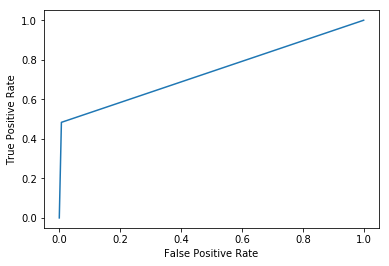

In [39]:
#plot the roc curve
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [40]:
print(roc_auc_score(y_test,y_pred))

0.7382860195360196


### F1-score

In [41]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.6330935251798562


## Model Tuning

In [50]:
from sklearn.model_selection import GridSearchCV
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
grid_search = GridSearchCV(clf, param_grid)
clf_cv.fit(X_train,y_train)
print(clf_cv.best_estimator_)

C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=23, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [52]:
clf_cv.best_score_

0.932483120780195

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=43, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
y_pred=clf.predict(X_test)
churn_conf_metric=confusion_matrix(y_test,y_pred)
print(churn_conf_metric)


0.9355322338830585
[[574   2]
 [ 41  50]]


In [57]:
## Precision Score and Recall Score
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test,y_pred))

0.9615384615384616


In [58]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

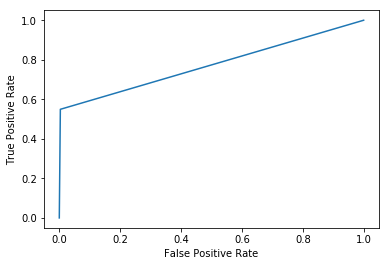

In [60]:
#plot the roc curve
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [61]:
print(roc_auc_score(y_test,y_pred))

0.7729891636141636


In [63]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.6993006993006995


## Feature Importance

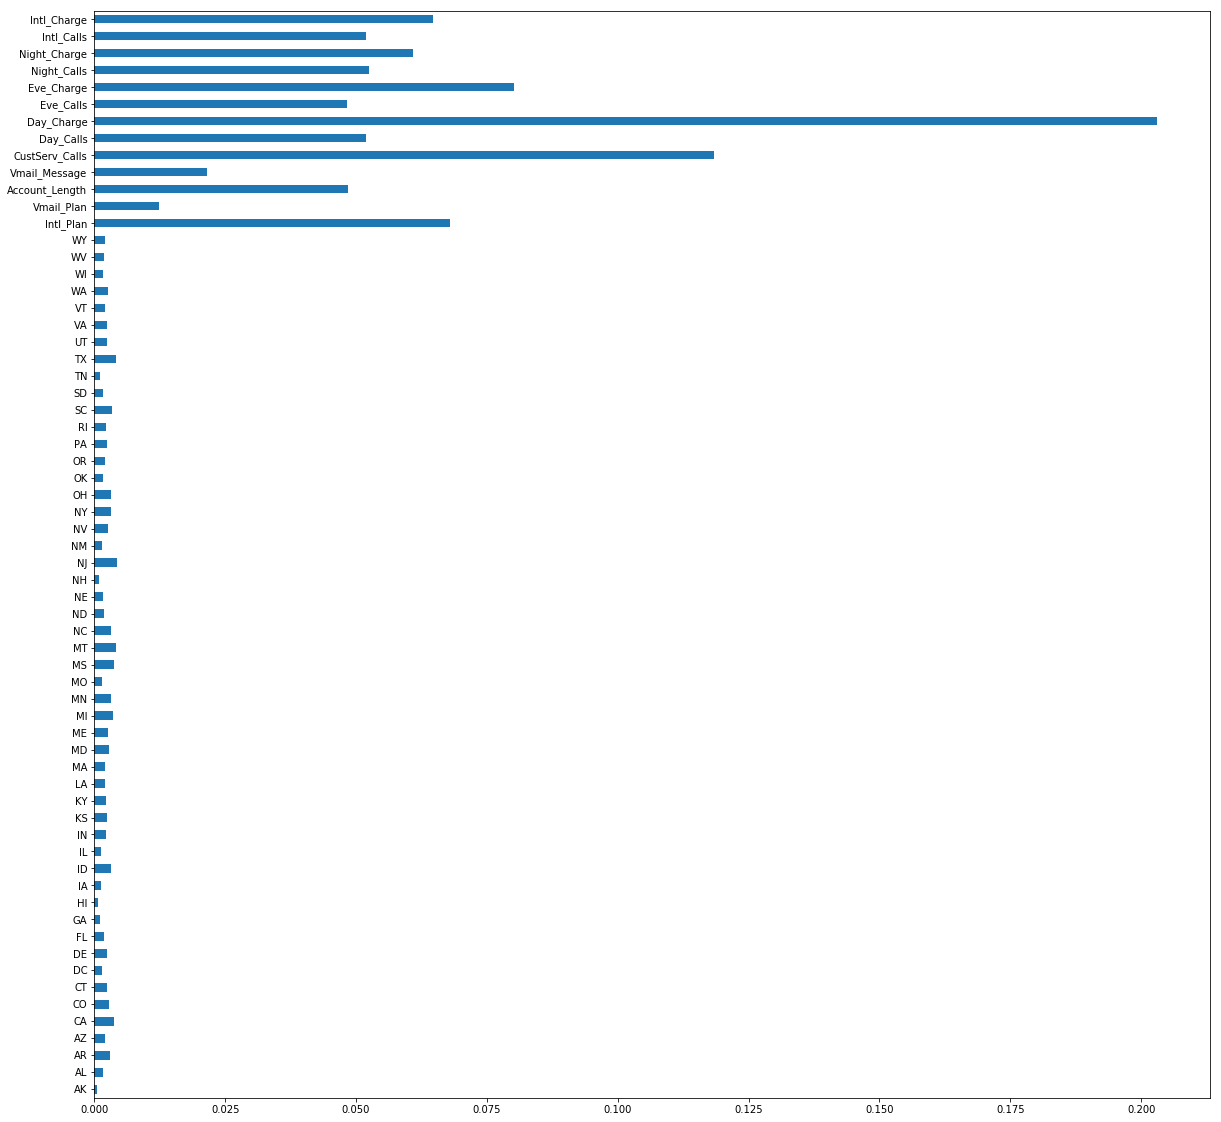

In [79]:
importances=pd.Series(clf.feature_importances_, index=X.columns)
sorted_index = np.argsort(importances)
importances.plot(kind='barh', figsize=(20,20))
